<a href="https://colab.research.google.com/github/MuhammadJundullah/Data-Analytics/blob/main/Mitra_MSIB_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_excel('/content/PIVOT MSIB Batch 6 List 25112023 06.30.xlsx', sheet_name='raw data')
df = df.drop(df.index[0])
df

,name,quota,activity_type,location,mitra_name
1,11.\tTECHNICAL PRODUCT MANAGER,1,OFFLINE,Jakarta dan Malang,KLY (Kapanlagi Youniverse)
2,12.\tAPP STORE OPTIMIZATION (ASO) SPECIALIST,1,OFFLINE,Jakarta dan Malang,KLY (Kapanlagi Youniverse)
3,13.\tUX RESEARCH,1,OFFLINE,Jakarta dan Malang,KLY (Kapanlagi Youniverse)
4,14.\tADMINISTRASI,3,OFFLINE,Jakarta dan Malang,KLY (Kapanlagi Youniverse)
5,15.\tKOL SPECIALIST,2,OFFLINE,Jakarta dan Malang,KLY (Kapanlagi Youniverse)
...,...,...,...,...,...
4447,Youth Creative specialist program,3,OFFLINE,Kota Jambi,Telkomsel
4448,Youth Segment Costumer (Abepura),1,OFFLINE,Kota Jayapura,Telkomsel
4449,Youth Segment Costumer (Jayapura),1,OFFLINE,Kota Jayapura,Telkomsel
4450,Youth Segment Costumer (Keerom),1,OFFLINE,Kota Jayapura,Telkomsel


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4451 entries, 1 to 4451
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4451 non-null   object
 1   quota          4451 non-null   int64 
 2   activity_type  4451 non-null   object
 3   location       4451 non-null   object
 4   mitra_name     4451 non-null   object
dtypes: int64(1), object(4)
memory usage: 174.0+ KB


In [3]:
df.isna().sum()

name             0
quota            0
activity_type    0
location         0
mitra_name       0
dtype: int64

In [4]:
df['quota'].sum()

20367

In [5]:
df.drop(columns=['activity_type'], inplace=True)

<ipython-input-6-e706dceb9854>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='mitra_name', x='quota', data=quota_mitra, palette='muted')


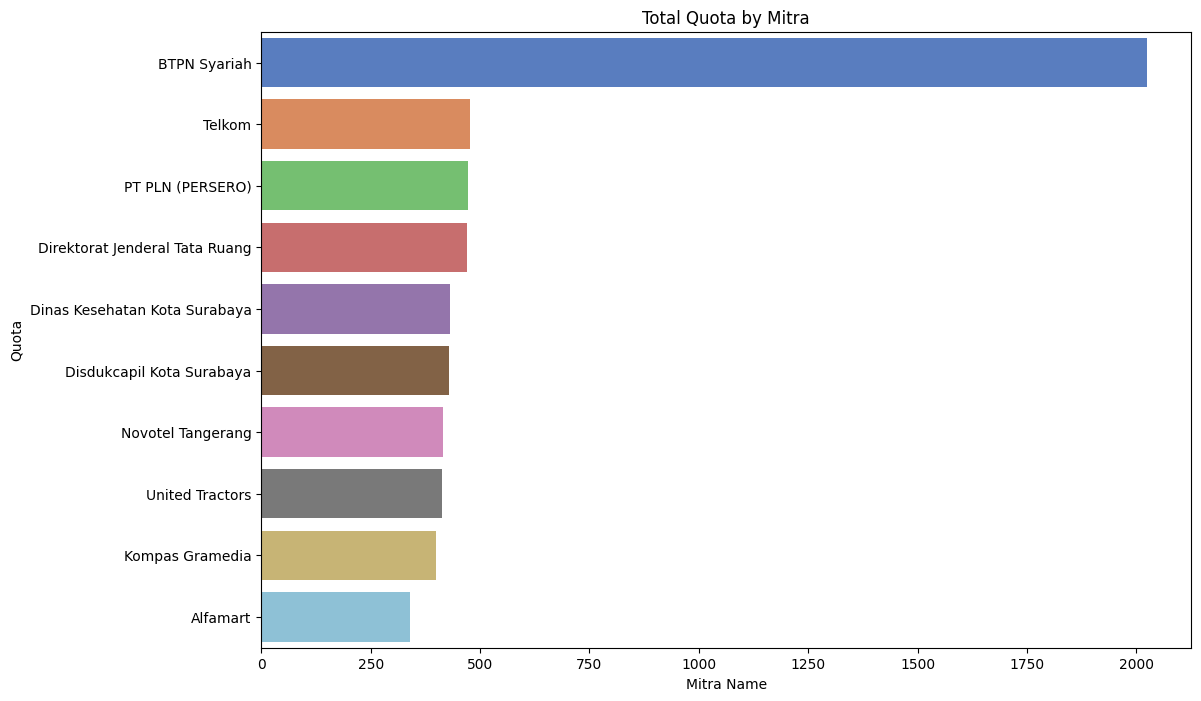

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

quota_mitra = df.groupby('mitra_name')['quota'].sum().sort_values(ascending=False).reset_index()
quota_mitra = quota_mitra.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y='mitra_name', x='quota', data=quota_mitra, palette='muted')
plt.xlabel('Mitra Name')
plt.ylabel('Quota')
plt.title('Total Quota by Mitra')
plt.show()


<ipython-input-7-548c4f3dd3b4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='mitra_name', x='quota', data=quota_da, palette='muted')


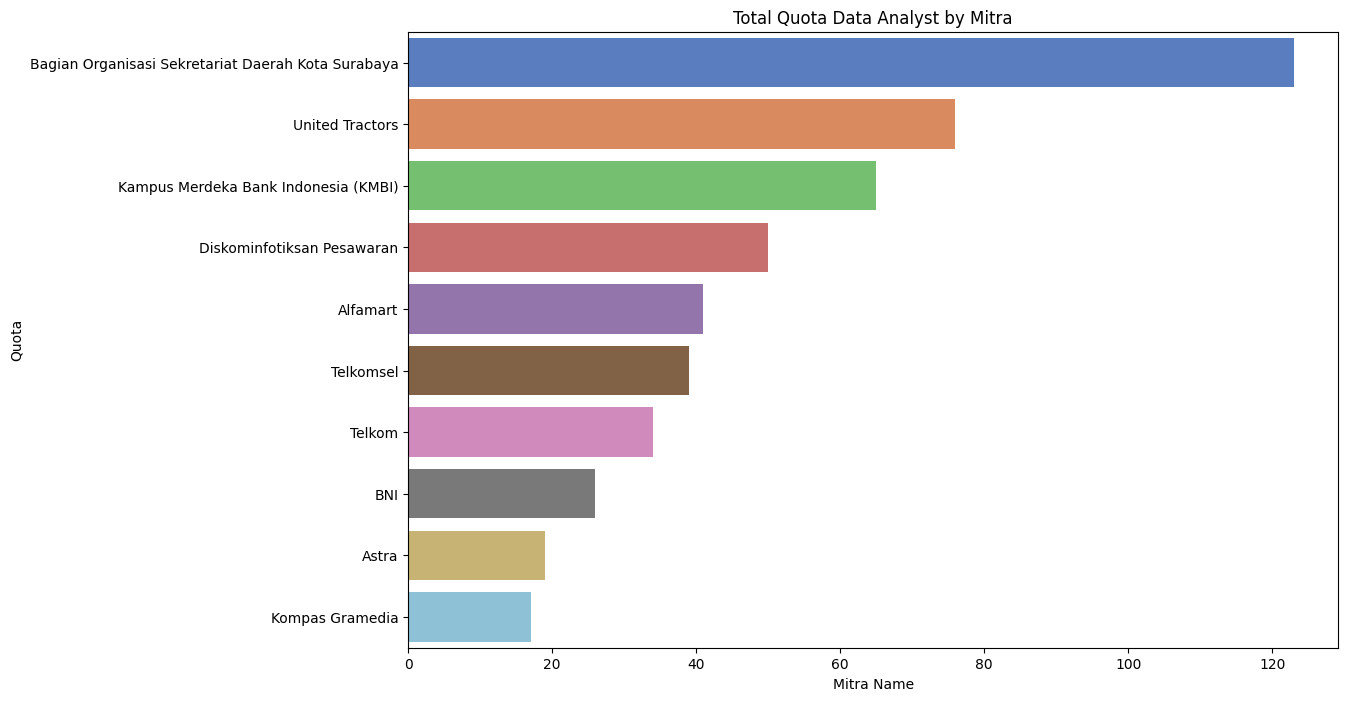

In [7]:
da = df[df['name'].str.contains('Data|Data Analyst', case=False)]

quota_da = da.groupby('mitra_name')['quota'].sum().sort_values(ascending=False).reset_index()
quota_da = quota_da.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y='mitra_name', x='quota', data=quota_da, palette='muted')
plt.xlabel('Mitra Name')
plt.ylabel('Quota')
plt.title('Total Quota Data Analyst by Mitra')
plt.show()



<ipython-input-8-81fccbab3486>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='location', x='quota', data=quota_mitra, palette='muted')


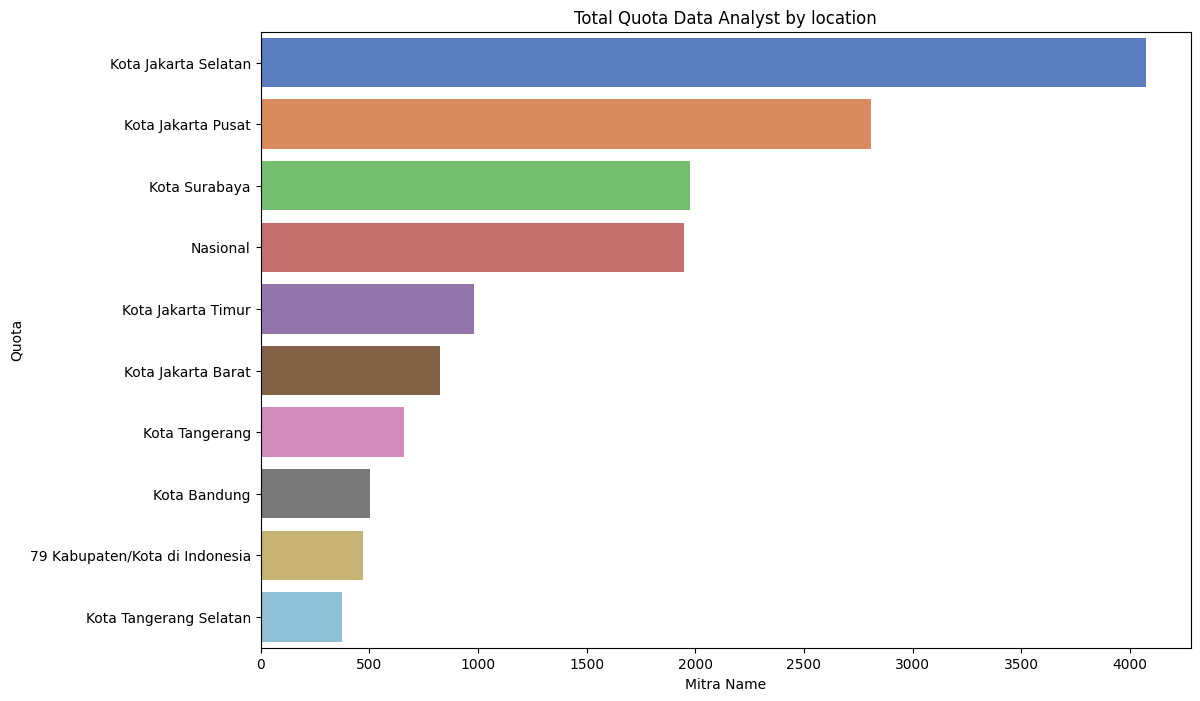

In [8]:
quota_mitra = df.groupby('location')['quota'].sum().sort_values(ascending=False).reset_index()
quota_mitra = quota_mitra.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(y='location', x='quota', data=quota_mitra, palette='muted')
plt.xlabel('Mitra Name')
plt.ylabel('Quota')
plt.title('Total Quota Data Analyst by location')
plt.show()


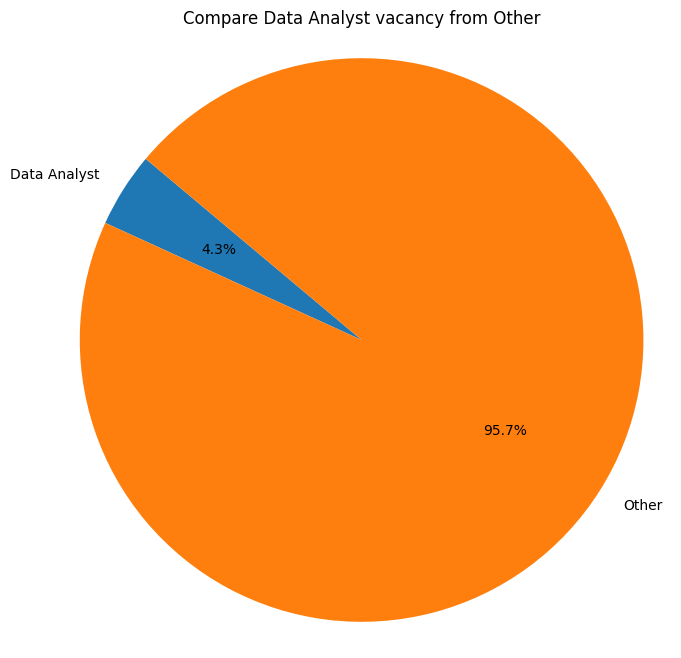

In [18]:
neg_da = df[~df['name'].str.contains('Data|Data Analyst', case=False)]
total_da = da['name'].count()
total_neg = neg_da['name'].count()

labels = ['Data Analyst', 'Other']
sizes = [total_da, total_neg]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Compare Data Analyst vacancy from Other')
plt.axis('equal')
plt.show()
